In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [2]:

# Load the CSV data into a DataFrame
df = pd.read_csv('college.csv')

In [3]:
# Select relevant columns for clustering
columns_of_interest = [
    'Faculty',
    'Are you interested to learn add on courses?'
]

In [4]:
# Drop any rows with missing values if necessary
df = df.dropna(subset=columns_of_interest)

In [5]:
# Encode categorical variables
encoder = LabelEncoder()
df['Faculty_encoded'] = encoder.fit_transform(df['Faculty'])
df['Interested_encoded'] = encoder.fit_transform(df['Are you interested to learn add on courses?'])


In [6]:
# Select features for clustering
X = df[['Faculty_encoded', 'Interested_encoded']]


C:\Users\Ritesh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Ritesh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


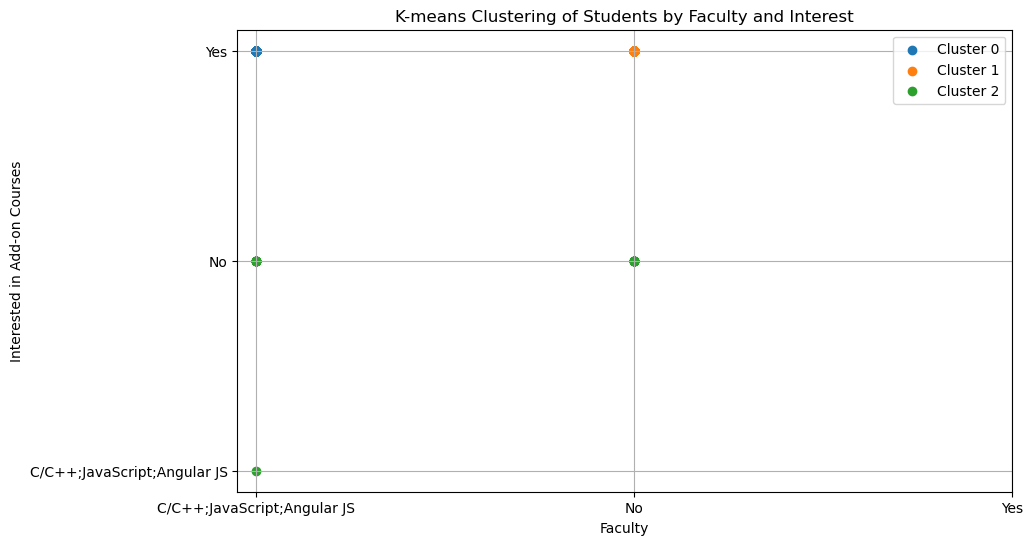

In [11]:

# Apply K-means clustering
k = 3  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)
# Visualize clusters
plt.figure(figsize=(10, 6))

# Scatter plot of clusters
for cluster in range(k):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['Faculty_encoded'], cluster_data['Interested_encoded'], label=f'Cluster {cluster}')
    
    
plt.xlabel('Faculty')
plt.ylabel('Interested in Add-on Courses')
plt.title('K-means Clustering of Students by Faculty and Interest')
plt.xticks(ticks=range(len(encoder.classes_)), labels=encoder.classes_)
plt.yticks(ticks=range(len(encoder.classes_)), labels=encoder.classes_)
plt.legend()
plt.grid(True)
plt.show()
